In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
true = pd.read_csv('True.csv',on_bad_lines='skip',encoding='latin-1')
fake = pd.read_csv('Fake.csv',on_bad_lines='skip',encoding='latin-1')

In [ ]:
true['verdict']='True'
fake['verdict']='Fake'

data=pd.concat([true,fake],ignore_index=True).reset_index(drop=True)

In [ ]:
data.info()
data.isnull().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44897 entries, 0 to 44896
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44897 non-null  object
 1   text     44897 non-null  object
 2   subject  44897 non-null  object
 3   date     44897 non-null  object
 4   verdict  44897 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


,title,text,subject,date,verdict
count,44897,44897,44897,44897,44897
unique,38728,38645,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11271,182,23481


In [ ]:
data.head()

,title,text,subject,date,verdict
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


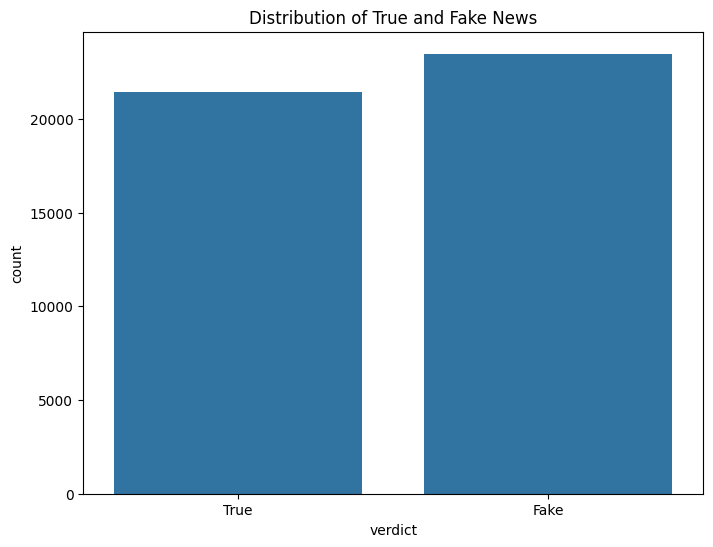

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='verdict', data=data)
plt.title('Distribution of True and Fake News')
plt.show()

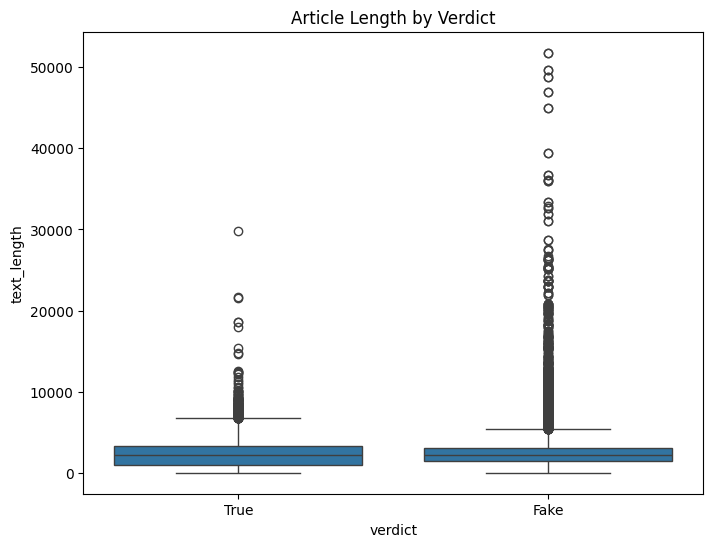

In [ ]:
data['text_length'] = data['text'].apply(len)

plt.figure(figsize=(8, 6))
sns.boxplot(x='verdict', y='text_length', data=data)
plt.title('Article Length by Verdict')
plt.show()

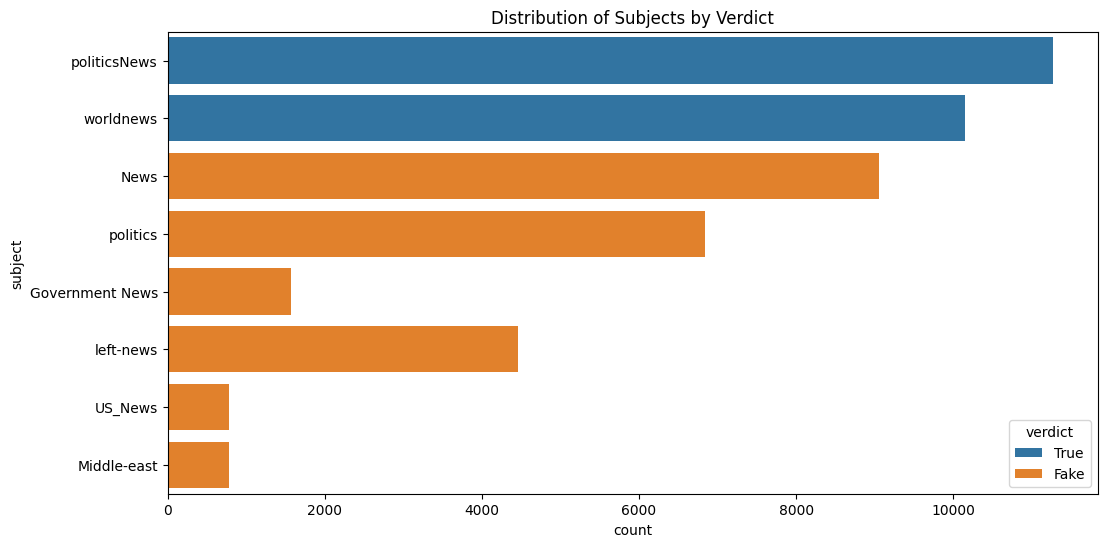

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='subject', data=data, hue='verdict')
plt.title('Distribution of Subjects by Verdict')
plt.show()

In [ ]:
from collections import Counter

def get_top_n_words(corpus, n=None):
  vec = Counter()
  for text in corpus:
    for word in text.split():
      vec[word] += 1
  return vec.most_common(n)

top_words_true = get_top_n_words(data[data['verdict'] == 'True']['text'], 20)
top_words_fake = get_top_n_words(data[data['verdict'] == 'Fake']['text'], 20)

print("Top 20 words in true news:")
print(top_words_true)
print("\nTop 20 words in fake news:")
print(top_words_fake)

Top 20 words in true news:
[('the', 423157), ('to', 243986), ('of', 204374), ('a', 188030), ('and', 179467), ('in', 169717), ('on', 104879), ('that', 82583), ('for', 77895), ('said', 72031), ('The', 58448), ('is', 54609), ('with', 53065), ('was', 47786), ('by', 46920), ('has', 46121), ('as', 45229), ('s', 44638), ('he', 43524), ('from', 38968)]

Top 20 words in fake news:
[('the', 483203), ('to', 286028), ('of', 233193), ('and', 213059), ('a', 202870), ('in', 152840), ('that', 138416), ('s', 127621), ('is', 105555), ('for', 88389), ('on', 76951), ('was', 66430), ('Trump', 64844), ('he', 62175), ('with', 60672), ('his', 55840), ('it', 53935), ('as', 51541), ('be', 47483), ('by', 45791)]


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#Tokenize the text
!pip install nltk
import nltk

In [ ]:
nltk.download('punkt')
from nltk.tokenize  import word_tokenize
text_data = data['text'].iloc[0]
words = word_tokenize(text_data)
print(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['WASHINGTON', '(', 'Reuters', ')', '-', 'The', 'head', 'of', 'a', 'conservative', 'Republican', 'faction', 'in', 'the', 'U.S.', 'Congress', ',', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', ',', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'Sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', '.', 'In', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'Republicans', ',', 'U.S.', 'Representative', 'Mark', 'Meadows', ',', 'speaking', 'on', 'CBS\x19', 'Face', 'the', 'Nation', ',', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', ',', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'January', '.', 'When', 'they', 'return', 'from', 'the', 'holidays', 'on', 'Wednesday', ',', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues'

In [ ]:
print(text_data)

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a fiscal conservative on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS Face the Nation, drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense discretionary spending on programs that support educati

In [ ]:
#converting all words to lower case
words2 = [i.lower() for i in words]

#print words2
print(words2)
print("before stopwords:", len(words2))

['washington', '(', 'reuters', ')', '-', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'u.s.', 'congress', ',', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', ',', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', '.', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', ',', 'u.s.', 'representative', 'mark', 'meadows', ',', 'speaking', 'on', 'cbs\x19', 'face', 'the', 'nation', ',', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', ',', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', '.', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', ',', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues'

In [ ]:

from nltk.corpus import stopwords

# Download the 'stopwords' dataset
nltk.download('stopwords')

# Now you can access the stopwords list
stopwords_list = stopwords.words('english')
stopwords_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#remove stopwords
words3 = []
for word in words2:
  if word not in stopwords_list:
    words3.append(word)
words3

print("after stopwords:", len(words3))

after stopwords: 555


In [ ]:
len(words)

843

In [ ]:
punctuations = "#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~....''``'s'!"
words_without_punctuations = []
for word in words3:
  if word not in punctuations:
    words_without_punctuations.append(word)
words_without_punctuations

['washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'u.s.',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 '2018',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'among',
 'republicans',
 'u.s.',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'cbs\x19',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'even',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'keep',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'big',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'also'

In [ ]:
print("removing the punctuations:", len(words_without_punctuations))

removing the punctuations: 458


In [ ]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

stemmed_words = [porter_stemmer.stem(word) for word in words_without_punctuations]
print(len(stemmed_words))

458


In [ ]:
from wordcloud import WordCloud
# Create the word_string variable
# Assuming stemmed_words is the list of words to be included in the wordcloud
word_string = " ".join(stemmed_words)

wordcloud = WordCloud(collocations = False).generate(word_string)

In [ ]:
#constructing a wordcloud for above stemmed_words and while constructing the word cloud make sure remove duplicated
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words4 = [word for word in stemmed_words if word not in ["republican","tax","budget",'spend', 'democrat', 'program', 'said', 'trump']]

len(words4)

397

In [ ]:
from collections import Counter

word_counts = Counter(stemmed_words)
print (word_counts)

Counter({'republican': 14, 'tax': 8, 'said': 8, 'trump': 7, 'program': 7, 'hous': 7, 'spend': 6, 'democrat': 6, 'budget': 5, 'u.s.': 4, 'vote': 4, 'pay': 4, 'fiscal': 4, 'repres': 4, 'meadow': 4, 'issu': 4, 'want': 4, 'aid': 4, 'conserv': 3, 'nation': 3, 'cut': 3, '2018': 3, 'feder': 3, 'pass': 3, 'immigr': 3, 'increas': 3, 'also': 3, 'non-defens': 3, 'discretionari': 3, 'say': 3, 'need': 3, 'overhaul': 3, 'trillion': 3, 'year': 3, 'crowley': 3, 'bill': 3, 'would': 3, 'packag': 3, 'senat': 3, 'washington': 2, 'congress': 2, 'debt': 2, 'call': 2, 'sunday': 2, 'keep': 2, 'among': 2, 'mark': 2, 'lawmak': 2, 'wednesday': 2, 'tri': 2, 'link': 2, 'polici': 2, 'congression': 2, 'seek': 2, 'control': 2, 'presid': 2, 'support': 2, 'health': 2, 'protect': 2, 'administr': 2, 'go': 2, '7': 2, 'percent': 2, 'govern': 2, '10': 2, 'decemb': 2, '1.5': 2, 'respons': 2, 'cb': 2, 'mani': 2, 'recent': 2, 'entitl': 2, 'assist': 2, 'social': 2, 'dreamer': 2, 'daca': 2, 'fund': 2, 'wall': 2, 'meet': 2, 'lead

In [ ]:
word_counts

Counter({'washington': 2,
         'reuter': 1,
         'head': 1,
         'conserv': 3,
         'republican': 14,
         'faction': 1,
         'u.s.': 4,
         'congress': 2,
         'vote': 4,
         'month': 1,
         'huge': 1,
         'expans': 1,
         'nation': 3,
         'debt': 2,
         'pay': 4,
         'tax': 8,
         'cut': 3,
         'call': 2,
         'fiscal': 4,
         'sunday': 2,
         'urg': 1,
         'budget': 5,
         'restraint': 1,
         '2018': 3,
         'keep': 2,
         'sharp': 1,
         'pivot': 1,
         'way': 1,
         'among': 2,
         'repres': 4,
         'mark': 2,
         'meadow': 4,
         'speak': 1,
         'cbs\x19': 1,
         'face': 1,
         'drew': 1,
         'hard': 1,
         'line': 1,
         'feder': 3,
         'spend': 6,
         'lawmak': 2,
         'brace': 1,
         'battl': 1,
         'januari': 1,
         'return': 1,
         'holiday': 1,
         'wednesday

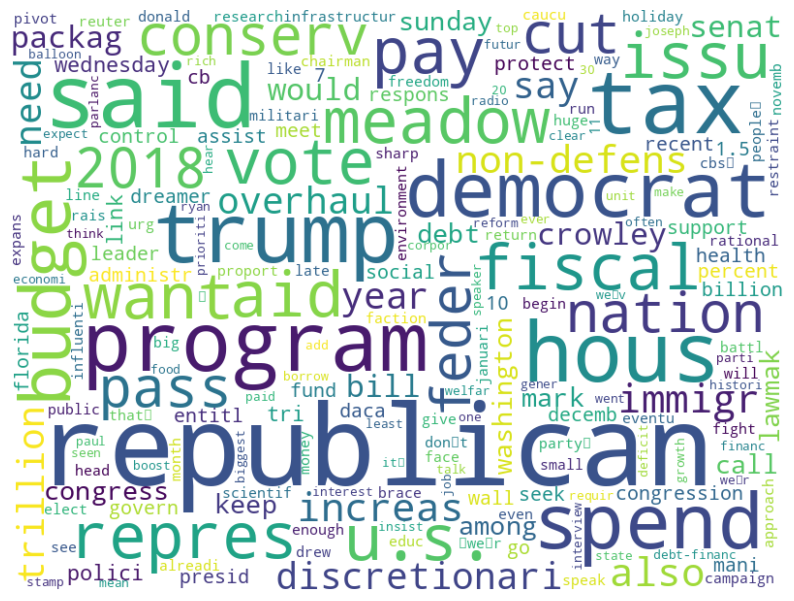

In [ ]:
# Create the word_string variable
# Assuming words4 is the list of words to be included in the wordcloud
word_string = " ".join(words3)

wordcloud = WordCloud(collocations = True).generate(word_string)

wordcloud = WordCloud(width = 800, height = 600, background_color = 'white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
#Model Building
data.head()

,title,text,subject,date,verdict,text_length
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,4659
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,4077
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,2789
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,2461
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,5204


In [ ]:
#Splitting
X = data['text']
Y = data['verdict']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
feature_names = tfidf_vectorizer.get_feature_names_out()


In [ ]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(X_train_tfidf, Y_train)

y_pred_train = model.predict(X_train_tfidf) # Predict on TF-IDF transformed training data
y_pred_test = model.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(Y_test, y_pred_test)
print("Accuracy:", accuracy)
print(classification_report(Y_test,y_pred_test))

Accuracy: 0.9335189309576838
              precision    recall  f1-score   support

        Fake       0.93      0.94      0.94      4644
        True       0.93      0.93      0.93      4336

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [ ]:
#metrics
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,y_pred_train)
print("Training Accuracy score:", round(ac1,3))
ac2 = accuracy_score(Y_test,y_pred_test)
print('Testing accuracy score:',round(ac2,3))

Training Accuracy score: 0.936
Testing accuracy score: 0.934


In [ ]:
doc = " ".join(words4)
doc

'washington reuter head conserv faction u.s. congress vote month huge expans nation debt pay cut call fiscal conserv sunday urg restraint 2018 keep sharp pivot way among u.s. repres mark meadow speak cbs\x19 face nation drew hard line feder lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder fight like link issu immigr polici even novemb congression elect campaign approach seek keep control congress presid donald want big increas militari also want proport increas non-defens discretionari support educ scientif research infrastructur public health environment protect administr alreadi will say \x18we\x19r go increas non-defens discretionari 7 percent \x19 meadow chairman small influenti hous freedom caucu say that\x19 enough need give govern pay rais 10 11 percent fiscal conserv don\x19t see rational eventu run people\x19 money meadow among vote late decemb party\x19 debt-financ overhaul expect balloon feder deficit add 1.5 trillion 10 year 20 trillion nation

In [ ]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#Create a count Vectorizer
vect = CountVectorizer(ngram_range=(3,3))

counts = vect.fit_transform([doc])
counts

<1x387 sparse matrix of type '<class 'numpy.int64'>'
	with 387 stored elements in Compressed Sparse Row format>

In [ ]:
#Getting vocabulary of the vectorizer
vocab = vect.get_feature_names_out()
vocab

array(['10 11 percent', '10 year 20', '11 percent fiscal',
       '20 trillion nation', '2018 expir date', '2018 keep sharp',
       '2018 parlanc entitl', '30 year boost', '44 billion request',
       '81 billion aid', 'action childhood arriv', 'add trillion 10',
       'administr alreadi will', 'administr senat yet',
       'agre help dreamer', 'aid hous pass', 'aid meet congression',
       'aid packag hurrican', 'alreadi will say', 'also schedul meet',
       'also support bill', 'also want proport', 'among repres mark',
       'among vote late', 'approach seek keep', 'approv prevent govern',
       'arriv daca protect', 'assist medicar medicaid',
       'assist needi seiz', 'back seat senat', 'balloon feder deficit',
       'battl januari return', 'begin tri pass', 'big increas militari',
       'biggest overhaul 30', 'bill recent went', 'bill we ever',
       'bill would requir', 'billion aid packag',
       'billion request administr', 'boost economi job',
       'border wall im

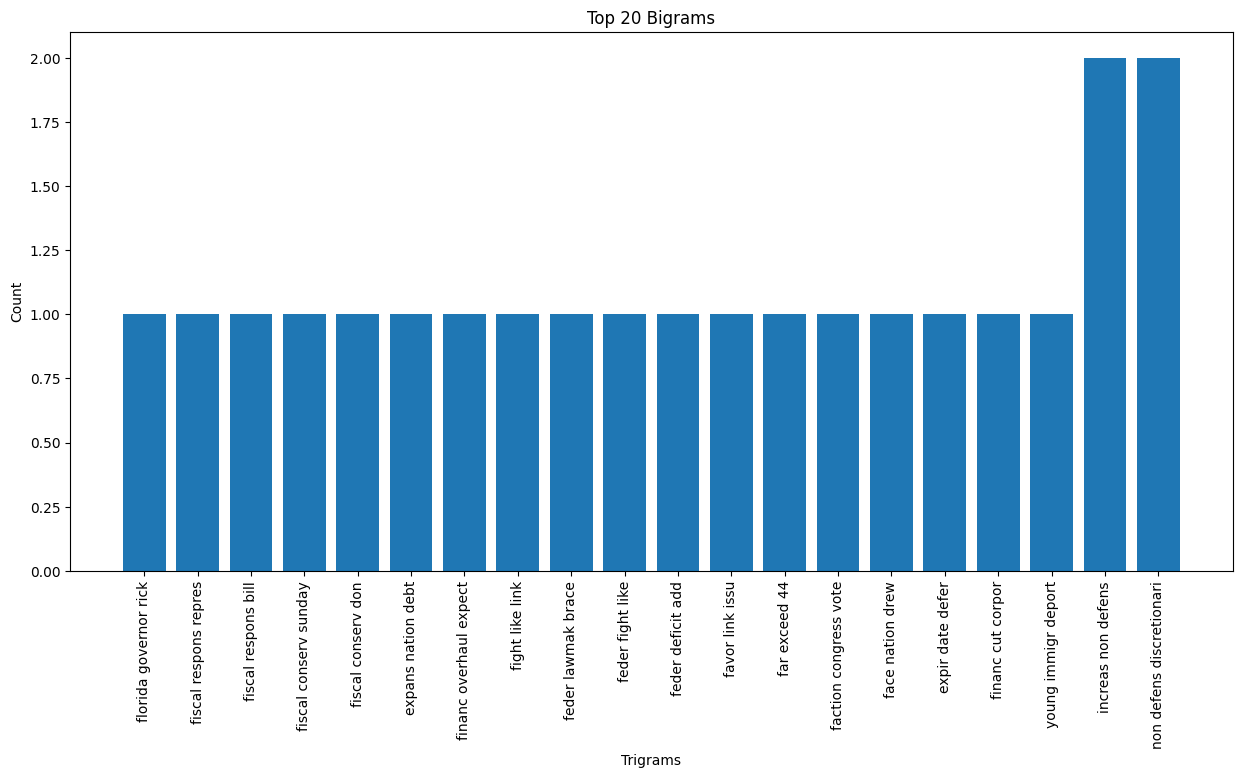

In [ ]:
top_20_bigrams = counts.toarray().sum(axis=0).argsort()[-20:]
#create a bar graph
plt.figure(figsize=(15,7))
plt.bar(vocab[top_20_bigrams], counts.toarray()[0, top_20_bigrams])
plt.xticks(rotation = 90)
plt.xlabel("Trigrams")
plt.ylabel("Count")
plt.title("Top 20 Bigrams")
plt.show()

In [ ]:
# prompt: sentiment analysis for the above data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
import nltk
from nltk.tokenize  import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have the 'data' DataFrame from the previous code

!pip install textblob

from textblob import TextBlob

def get_sentiment(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity

data['sentiment_polarity'] = data['text'].apply(get_sentiment)


In [ ]:
 # Assuming text_data is a string containing multiple lines of text
lines = text_data.splitlines()

# Create a DataFrame with a single column named 'text' containing the lines
df_lines = pd.DataFrame({'text': lines})

# Now you have a DataFrame with each line as a separate row.
print(df_lines.head())


                                                text
0  WASHINGTON (Reuters) - The head of a conservat...
1                                fiscal conservative
2   on Sunday and urged budget restraint in 2018....
3                                   Face the Nation,
4   drew a hard line on federal spending, which l...


In [ ]:
df_lines.shape

(23, 1)

In [ ]:
#remove empty rows from the data
data = data.dropna(subset=['text'])
print(data.shape)

(44897, 7)


In [ ]:
df_lines.head()

,text
0,WASHINGTON (Reuters) - The head of a conservat...
1,fiscal conservative
2,on Sunday and urged budget restraint in 2018....
3,"Face the Nation,"
4,"drew a hard line on federal spending, which l..."


In [ ]:
df_lines.tail()

,text
18,"programs mean food stamps, housing assistance..."
19,"Dreamers,"
20,people brought illegally to the country as ch...
21,"We need to do DACA clean,"
22,"she said. On Wednesday, Trump aides will mee..."


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
#Instantiate the entiment analyzer
analyzer = SentimentIntensityAnalyzer()
#creating new column for the Sentiment
df_lines['Sentiment_0'] = df_lines['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
#Classify each statement  positive or negative based on the sentiment score
# Changed df_lines['Sentiment_0'] to df['Sentiment_0']
df_lines['Sentiment'] = df_lines['Sentiment_0'].apply(lambda x: 'positive' if x > 0 else 'negative')
#Display the updated DataFrame
print(df_lines)

                                                 text  Sentiment_0 Sentiment
0   WASHINGTON (Reuters) - The head of a conservat...      -0.4215  negative
1                                 fiscal conservative       0.0000  negative
2    on Sunday and urged budget restraint in 2018....       0.0000  negative
3                                    Face the Nation,       0.0000  negative
4    drew a hard line on federal spending, which l...      -0.0258  negative
5                                       discretionary       0.0000  negative
6    spending on programs that support education, ...       0.4019  positive
7   The (Trump) administration has already been wi...       0.3182  positive
8    Meadows, chairman of the small but influentia...       0.8922  positive
9   Now, Democrats are saying thats not enough, w...      -0.1027  negative
10   he said. Meadows was among Republicans who vo...      -0.6369  negative
11  Its interesting to hear Mark talk about fisca...       0.4019  positive

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_lines['Sentiment'].value_counts()

,count
Sentiment,
negative,13
positive,10


In [ ]:
import string
df_lines['text'] = df_lines['text'].str.replace('[{}]'.format(string.punctuation),' ')
df_lines.head()

,text,Sentiment_0,Sentiment
0,WASHINGTON (Reuters) - The head of a conservat...,-0.4215,negative
1,fiscal conservative,0.0000,negative
2,on Sunday and urged budget restraint in 2018....,0.0000,negative
3,"Face the Nation,",0.0000,negative
4,"drew a hard line on federal spending, which l...",-0.0258,negative


In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_lines['text'] = df_lines['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df_lines.head()

,text,Sentiment_0,Sentiment
0,WASHINGTON (Reuters) - The head of a conservat...,-0.4215,negative
1,fiscal conservative,0.0000,negative
2,on Sunday and urged budget restraint in 2018. ...,0.0000,negative
3,"Face the Nation,",0.0000,negative
4,"drew a hard line on federal spending, which la...",-0.0258,negative


In [ ]:
#stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) # Get the list of English stopwords using stopwords.words('english')
lemmatizer = WordNetLemmatizer()
df_lines['text'] = df_lines['text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words])) # Use stop_words (the set of stopwords) in the list comprehension
df_lines.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,Sentiment_0,Sentiment
0,WASHINGTON (Reuters) - The head conservative R...,-0.4215,negative
1,fiscal conservative,0.0000,negative
2,Sunday urged budget restraint 2018. In keeping...,0.0000,negative
3,"Face Nation,",0.0000,negative
4,"drew hard line federal spending, lawmaker brac...",-0.0258,negative


In [ ]:
Y = df_lines['Sentiment']
X = df_lines['text']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(X,Y)

MultinomialNB()

In [ ]:
y_pred = model1.predict(X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y,y_pred)
print(f"Accuracy Score:{round(accuracy, 2)}")

Accuracy Score:1.0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming Y is your true labels and y_pred are your predicted labels
accuracy = accuracy_score(Y, y_pred)
precision = precision_score(Y, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(Y, y_pred, average='weighted')  # Use 'weighted' for multi-class
f1 = f1_score(Y, y_pred, average='weighted')  # Use 'weighted' for multi-class

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

mnb_model = MultinomialNB()
mnb_model.fit(X_train_tfidf, Y_train)
mnb_y_pred = mnb_model.predict(X_test_tfidf)
mnb_accuracy = accuracy_score(Y_test, mnb_y_pred)
print("MultinomialNB Accuracy:", mnb_accuracy)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
MultinomialNB Accuracy: 0.9335189309576838


In [ ]:
# prompt: create simple random forest classifier and XGboost and ADA boost and compare their accuracies

from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, Y_train)
rf_y_pred = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(Y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9971046770601336


In [ ]:
#XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_tfidf, Y_train)  # Y_train now has numerical values
xgb_y_pred = xgb_model.predict(X_test_tfidf)
xgb_accuracy = accuracy_score(Y_test, xgb_y_pred)
print("XGBoost Accuracy:", xgb_accuracy)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['Fake' 'True']

In [ ]:
#XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training data and transform it
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test) # Transform Y_test as well


xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_tfidf, Y_train_encoded)  # Use the encoded Y_train
xgb_y_pred = xgb_model.predict(X_test_tfidf)

# Inverse transform the predictions to get original labels if needed
xgb_y_pred_original = label_encoder.inverse_transform(xgb_y_pred)

xgb_accuracy = accuracy_score(Y_test_encoded, xgb_y_pred)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.9981069042316258


In [ ]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_tfidf, Y_train)
ada_y_pred = ada_model.predict(X_test_tfidf)
ada_accuracy = accuracy_score(Y_test, ada_y_pred)
print("AdaBoost Accuracy:", ada_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.9972160356347439


In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed
lr_model.fit(X_train_tfidf, Y_train)
lr_y_pred = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(Y_test, lr_y_pred)
print("Logistic Regression Accuracy:", lr_accuracy)


Logistic Regression Accuracy: 0.987305122494432


In [ ]:
# MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train_tfidf, Y_train)
mnb_y_pred = mnb_model.predict(X_test_tfidf)
mnb_accuracy = accuracy_score(Y_test, mnb_y_pred)
print("MultinomialNB Accuracy:", mnb_accuracy)



MultinomialNB Accuracy: 0.9335189309576838


In [ ]:
# Compare accuracies
print("\nAccuracy Comparison:")
print("Random Forest:", rf_accuracy)
print("XGBoost:", xgb_accuracy)
print("AdaBoost:", ada_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("MultinomialNB Accuracy:", mnb_accuracy)



Accuracy Comparison:
Random Forest: 0.9971046770601336
XGBoost: 0.9981069042316258
AdaBoost: 0.9972160356347439
Logistic Regression Accuracy: 0.987305122494432
MultinomialNB Accuracy: 0.9335189309576838


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(mnb_model, open(filename, 'wb'))

NameError: name 'mnb_model' is not defined